In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Clear console
import warnings
warnings.filterwarnings("ignore")


In [2]:
xls = pd.ExcelFile('../data/WorldEnergyBalancesHighlights_final.xlsx')

df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
br = df.loc[('Brazil')]

In [3]:
def dickeyF(dados):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dados, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

def diferencia(serie):
    val = True
    res = pd.Series(index=serie.index[1:])
    ant = 0
    for i in serie.index[1:]:
        if val:
            ant = serie.index[0]
            val = False
        res[i] = serie[i] - serie[ant]
        ant = i
    return res

def difreverse(diferenciado,inicial):
    res = pd.Series(index=diferenciado.index)
    res[diferenciado.index[0]] = diferenciado[diferenciado.index[0]] + inicial
    temp = diferenciado.index[0]
    for i in diferenciado.index[1:]:
        res[i] = diferenciado[i] + res[temp]
        temp = i
    return res

In [4]:
def forecast_timestamp(df,order):
    print("Teste de Dickey-Fuller sem normalizacoes")
    dickeyF(df)

    print("Teste de Dickey-Fuller aplicando normalizao logaritimica")
    log = pd.Series(np.log(df))
    dickeyF(log)

    print("Teste de Dickey-Fuller aplicando normalizao logaritimica e diferenciacao")
    dif = diferencia(log)
    dickeyF(dif)
    print("\n")

    print("Funções ACF e PACF")
    plot_acf(dif)
    plot_pacf(dif, lags = 12)
    plt.show()
    print("\n")

    #Treinando modelo do ARIMA
    mod = statsmodels.tsa.arima_model.ARIMA(dif,order=order)
    result= mod.fit()

    print("Comparando treinamento com os dados reais")
    result_arima = result.predict(start=0,end=27)
    rev_dif = difreverse(result_arima,log[1991])
    np.exp(rev_dif).plot()
    df.plot()
    plt.show()
    print("\n\n")

    print("Realizando predicao para 5 anos no futuro")
    forecast = result.forecast(5)[0]
    predict = pd.Series(data=forecast,index=[2019,2020,2021,2022,2023])

    rev_dif = difreverse(predict,log[2018])
    normal = np.exp(rev_dif)
    normal[2018]=df[2018]
    normal = normal.sort_index(axis=0)
    print(normal)
    normal.plot()
    df.plot()
    plt.show()
    print("\n\n")

### Predicao para energia renovaveis

Teste de Dickey-Fuller sem normalizacoes
Results of Dickey-Fuller Test:
Test Statistic                 -0.262084
p-value                         0.930705
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica
Results of Dickey-Fuller Test:
Test Statistic                 -1.139136
p-value                         0.699215
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica e diferenciacao
Results of Dickey-Fuller Test:
Test Statistic                 -5.169729
p-value                         0.000010
#Lags Used                      0.000000
Number of

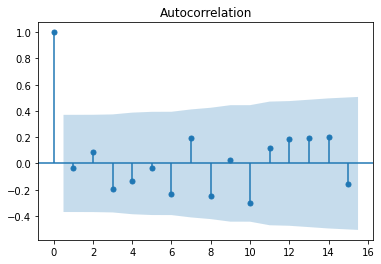

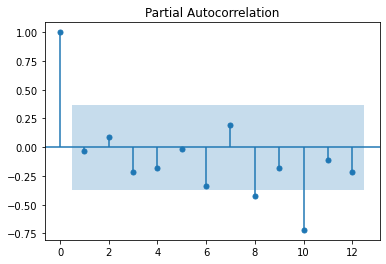

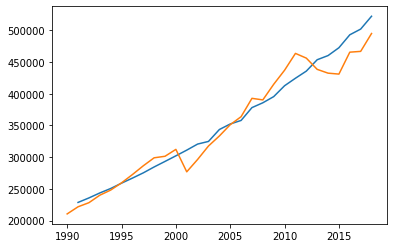

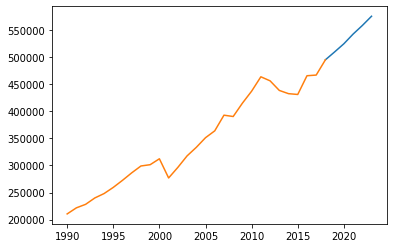

In [5]:
renew = br.loc[('Renewable sources')]
renew = renew.transpose()
forecast_timestamp(renew['Electricity output (GWh)'],(2,0,2))

### Predicao para energia Fosseis

Teste de Dickey-Fuller sem normalizacoes
Results of Dickey-Fuller Test:
Test Statistic                  1.793630
p-value                         0.998336
#Lags Used                      8.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica
Results of Dickey-Fuller Test:
Test Statistic                 -1.034056
p-value                         0.740641
#Lags Used                      1.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica e diferenciacao
Results of Dickey-Fuller Test:
Test Statistic                 -2.713167
p-value                         0.071787
#Lags Used                      9.000000
Number of

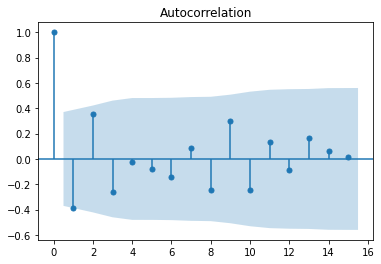

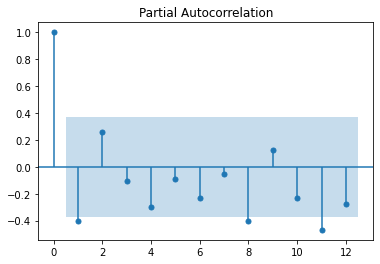

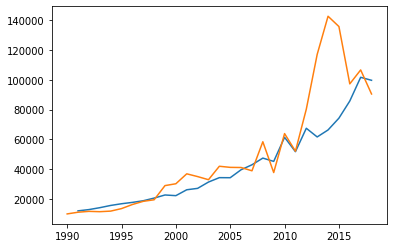

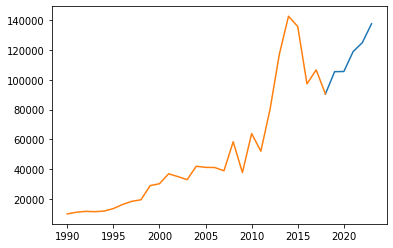

In [6]:
renew = br.loc[('Fossil fuels')]
renew = renew.transpose()
forecast_timestamp(renew['Electricity output (GWh)'],(2,0,0))

### Predicao para energia Nuclear

Teste de Dickey-Fuller sem normalizacoes
Results of Dickey-Fuller Test:
Test Statistic                 -1.045019
p-value                         0.736493
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica
Results of Dickey-Fuller Test:
Test Statistic                 -2.472092
p-value                         0.122413
#Lags Used                      9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64
Teste de Dickey-Fuller aplicando normalizao logaritimica e diferenciacao
Results of Dickey-Fuller Test:
Test Statistic                 -3.073066
p-value                         0.028612
#Lags Used                      7.000000
Number of

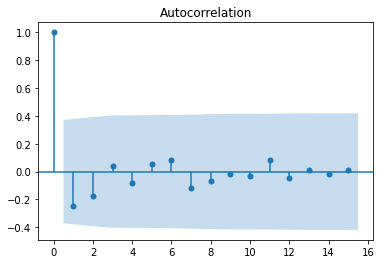

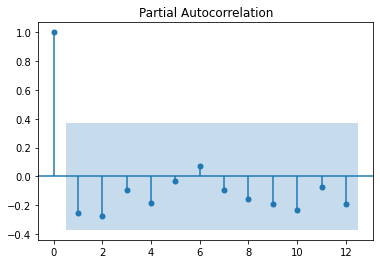

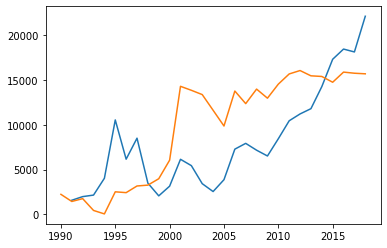

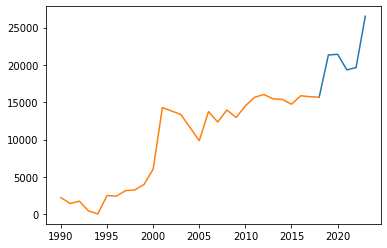

In [7]:
renew = br.loc[('Nuclear')]
renew = renew.transpose()
forecast_timestamp(renew['Electricity output (GWh)'],(5,0,4))